In [59]:
import numpy as np
from collections import defaultdict
import time
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib.colors import LinearSegmentedColormap
import time

W = LinearSegmentedColormap.from_list('w', ["w", "w"], N=256)

In [35]:
Move_Reward = -1
Final_Reward = 0

ACTIONS = {
    0: [1, 0],   # north
    1: [-1, 0],  # south
    2: [0, -1],  # west
    3: [0, 1],   # east
}
discount = 1

In [73]:
class GridWorld:
    def __init__(self, size=4):
       
        self.state_value = np.zeros((size, size))
        self.nA = len(ACTIONS)
        return


    def step(self, state, action):
        done = False
        # is terminal state?
        size = len(self.state_value) - 1
        if state == (0, 0) or state == (size, size):
            done = True
            return state, 0,done

        s_1 = (state[0] + action[0], state[1] + action[1])
        reward = -1
        # out of bounds north-south
        if s_1[0] < 0 or s_1[0] >= len(self.state_value):
            s_1 = state
        # out of bounds east-west
        elif s_1[1] < 0 or s_1[1] >= len(self.state_value):
            s_1 = state

        return s_1, reward,done

    def reset(self):

        x = np.random.randint(0,4)
        y = np.random.randint(0,4)

        state = [x,y]

        return state

    def get_action_prob(self):

        action_prob = []

        for x in range(self.nA):
            action_prob.append(0.25)

        return action_prob

    
    def get_episode(self):

        trajectory = []

        state = env.reset()

        while True:

            action_prob = self.get_action_prob()
            _action_ = np.random.choice(np.arange(self.nA),p = action_prob)
            action = ACTIONS.get(_action_)

            next_state,reward,done = self.step(state,action)

            trajectory.append((state,action,reward,done))
            state = next_state

            if done:
                break


        return trajectory
        
    def update_value(self,alpha):

        tra = self.get_episode()

        states,actions,rewards,dones = zip(*tra)

        for i,state in enumerate(states):

            if dones[i]:
                self.state_value[state] += alpha*(rewards[i] - self.state_value[state])
                break

            self.state_value[state] +=alpha*(rewards[i] + self.state_value[states[i+1]] - self.state_value[state])

        return self.state_value

    def TD_Prediction(self,iters,alpha):

        for eps in range(iters):
            if eps % 5 == 0:
                print("In Loop {:.5f}".format(eps), end="\r")

            self.state_value = self.update_value(alpha)

        return self.state_value



    def render(self, title=None):
        """
        Displays the current value table of mini gridworld environment
        """
        size = len(self.state_value) if len(self.state_value) < 20 else 20
        fig, ax = plt.subplots(figsize=(size, size))
        if title is not None:
            ax.set_title(title)
        ax.grid(which='major', axis='both',
                linestyle='-', color='k', linewidth=2)
        sn.heatmap(self.state_value, annot=True, fmt=".1f", cmap=W,
                   linewidths=1, linecolor="black", cbar=False)
        plt.show()
        return fig, ax


In [74]:
env = GridWorld()

In [75]:
state_values = env.TD_Prediction(iters = 100000,alpha=0.2)
print(state_values)

[[ -9.11961687 -22.8579272  -24.4361372  -24.91452813]
 [-20.16158502 -22.88366038 -23.85780643 -24.38676252]
 [-23.66702556 -24.02483162 -23.82044128 -20.84631703]
 [-23.94466374 -23.63680354 -20.45896615  -8.42615705]]


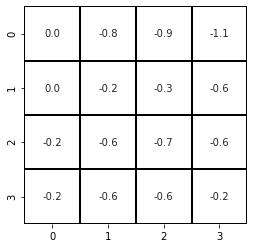

(<Figure size 288x288 with 1 Axes>, <AxesSubplot:>)

In [58]:
env.render()